In [1]:
#importing libraries
import numpy as np
import pandas as pd
from imageio import imread 
from skimage.transform import resize
import os
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#importing dataset
from keras.datasets import cifar10
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
#train test split
x_train = train_images[:35000]
y_train = train_labels[:35000]

x_valid = train_images[35000:]
y_valid = train_labels[35000:]

x_test = test_images
y_test = test_labels

In [4]:
#images shape
print("Train samples:", x_train.shape, y_train.shape)
print("Validation samples:", x_valid.shape, y_valid.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (35000, 32, 32, 3) (35000, 1)
Validation samples: (15000, 32, 32, 3) (15000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [0]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

In [0]:
#normalizing 
x_train2 = (x_train/255) - 0.5
x_valid2 = (x_valid/255) - 0.5
x_test2 = (x_test/255) - 0.5
y_train2 = keras.utils.to_categorical(y_train,NUM_CLASSES)
y_valid2 = keras.utils.to_categorical(y_valid,NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test,NUM_CLASSES)

In [0]:
#importing libraries for CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout
from keras.layers.advanced_activations import LeakyReLU

In [0]:
#model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [10]:
#checking how many epochs to use

epoch = 20
batch_size = 128

import time

a = time.time()
history = model.fit(x=x_train2, y=y_train2, batch_size=batch_size,
         epochs=epoch, validation_data=(x_valid2,y_valid2))
b = time.time()
  
time_taken = (b-a)

Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 13s 364us/step - loss: 1.7574 - accuracy: 0.3387 - val_loss: 1.4187 - val_accuracy: 0.4732
Epoch 2/20
35000/35000 [==============================] - 6s 170us/step - loss: 1.3438 - accuracy: 0.5087 - val_loss: 1.2482 - val_accuracy: 0.5551
Epoch 3/20
35000/35000 [==============================] - 6s 169us/step - loss: 1.1683 - accuracy: 0.5831 - val_loss: 1.1393 - val_accuracy: 0.5960
Epoch 4/20
35000/35000 [==============================] - 6s 170us/step - loss: 1.0488 - accuracy: 0.6273 - val_loss: 0.9355 - val_accuracy: 0.6658
Epoch 5/20
35000/35000 [==============================] - 6s 169us/step - loss: 0.9598 - accuracy: 0.6593 - val_loss: 0.8700 - val_accuracy: 0.6942
Epoch 6/20
35000/35000 [==============================] - 6s 170us/step - loss: 0.8717 - accuracy: 0.6933 - val_loss: 0.8131 - val_accuracy: 0.7158
Epoch 7/20
35000/35000 [==============================] - 6s 

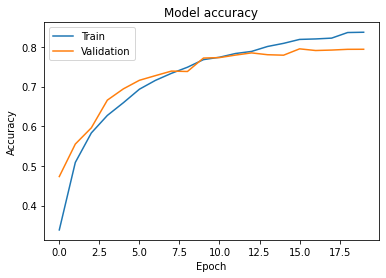

In [11]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

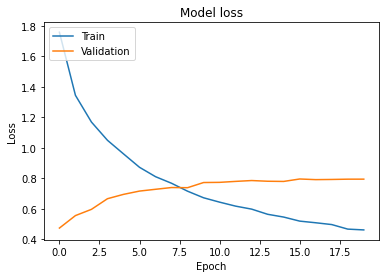

In [12]:
#training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [0]:
#We can see in the above figure how the validation accuracy plateaus after 12 epochs whereas the training accuracy keeps increasing due to overfitting on the training data. hence we will stop our model at 8 epochs.

In [0]:
#setting epochs and batch size
epoch_new = 12
batch_size = 128

In [15]:
#retraining model on new number of epochs
import time

a_new = time.time()
history = model.fit(x=x_train2, y=y_train2, batch_size=batch_size,
         epochs=epoch_new, validation_data=(x_valid2,y_valid2))
b_new = time.time()
  
time_taken = (b_new-a_new)

Train on 35000 samples, validate on 15000 samples
Epoch 1/12
35000/35000 [==============================] - 6s 169us/step - loss: 0.4486 - accuracy: 0.8420 - val_loss: 0.6031 - val_accuracy: 0.8004
Epoch 2/12
35000/35000 [==============================] - 6s 167us/step - loss: 0.4456 - accuracy: 0.8443 - val_loss: 0.6372 - val_accuracy: 0.7939
Epoch 3/12
35000/35000 [==============================] - 6s 166us/step - loss: 0.4232 - accuracy: 0.8532 - val_loss: 0.5957 - val_accuracy: 0.8051
Epoch 4/12
35000/35000 [==============================] - 6s 166us/step - loss: 0.4203 - accuracy: 0.8523 - val_loss: 0.6234 - val_accuracy: 0.8011
Epoch 5/12
35000/35000 [==============================] - 6s 166us/step - loss: 0.4064 - accuracy: 0.8560 - val_loss: 0.6083 - val_accuracy: 0.8080
Epoch 6/12
35000/35000 [==============================] - 6s 167us/step - loss: 0.4006 - accuracy: 0.8595 - val_loss: 0.6053 - val_accuracy: 0.8057
Epoch 7/12
35000/35000 [==============================] - 6s 1

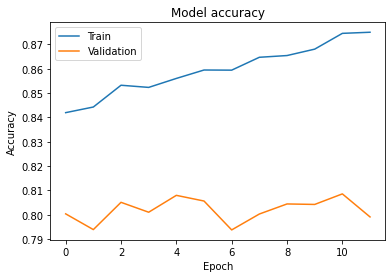

In [16]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

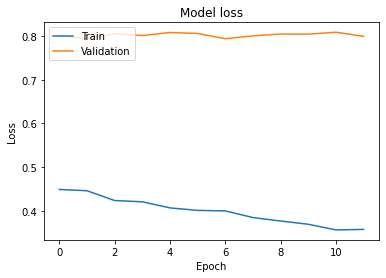

In [17]:
#training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [19]:
#to calculate time taken
time_taken = (b_new-a_new)
print(time_taken)

69.89376282691956


In [0]:
#save model and weights
model.save("model.h5")
model.save_weights("weights")

In [0]:
#to load saved model
from keras.models import load_model
model=load_model('model.h5')

In [0]:
#predictions
predictions = model.predict(x_test2)
predicted_classes = model.predict_classes(x_test2)

In [22]:
#to check shape of predictions
predicted_classes.shape

(10000,)

In [0]:
#converting to 1D array
predictions=predictions[:, 0]

In [24]:
#metrics and confusion matrix
from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(predicted_classes, y_test))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, predicted_classes, digits=10))

[[807  12  57  11   7   4   6   9  37  21]
 [ 12 907   5   3   0   0   1   1  35  72]
 [ 25   2 617  34  23  11  27  10   4   1]
 [ 19   8  59 643  56 108  74  38  16  34]
 [ 19   1  92  51 804  35  38  40   2   4]
 [ 13   4  98 197  35 806  34  59   4  12]
 [  8   6  38  32  17   1 813   5   5   8]
 [ 11   7  26  19  55  30   6 836   7   8]
 [ 60  11   6   5   3   3   1   1 874  13]
 [ 26  42   2   5   0   2   0   1  16 827]]
              precision    recall  f1-score   support

           0  0.8311019567 0.8070000000 0.8188736682      1000
           1  0.8754826255 0.9070000000 0.8909626719      1000
           2  0.8183023873 0.6170000000 0.7035347777      1000
           3  0.6094786730 0.6430000000 0.6257907543      1000
           4  0.7403314917 0.8040000000 0.7708533078      1000
           5  0.6386687797 0.8060000000 0.7126436782      1000
           6  0.8713826367 0.8130000000 0.8411795137      1000
           7  0.8318407960 0.8360000000 0.8339152120      1000
          

In [25]:
#precision, recall, F1 score
metrics.precision_score(y_test, predicted_classes, average='weighted')
metrics.recall_score(y_test, predicted_classes, average='weighted')
metrics.f1_score(y_test, predicted_classes, average='weighted')

0.7942931405500578

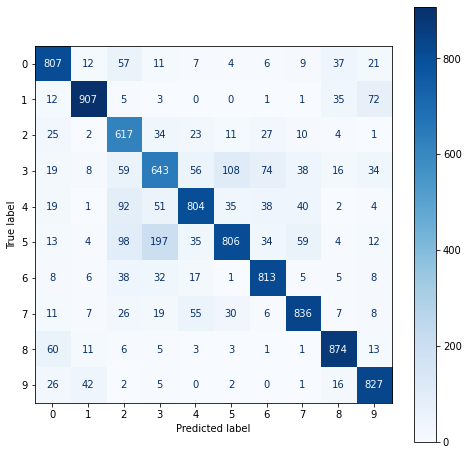

In [26]:
#confusion matrix
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(predicted_classes, y_test), display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']).plot(cmap=plt.cm.Blues, values_format='.0f')
plt.savefig("confusion_rf.png")